In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv("dataset for food-delivery-time-prediction.csv")
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38063 entries, 0 to 38062
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           38063 non-null  object 
 1   Delivery_person_ID           38063 non-null  object 
 2   Delivery_person_Age          38063 non-null  int64  
 3   Delivery_person_Ratings      38063 non-null  float64
 4   Restaurant_latitude          38063 non-null  float64
 5   Restaurant_longitude         38063 non-null  float64
 6   Delivery_location_latitude   38063 non-null  float64
 7   Delivery_location_longitude  38063 non-null  float64
 8   Order_Date                   38063 non-null  object 
 9   Time_Orderd                  38063 non-null  object 
 10  Time_Order_picked            38063 non-null  object 
 11  Weatherconditions            38063 non-null  object 
 12  Road_traffic_density         38063 non-null  object 
 13  Vehicle_conditio

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,38063.0,29.609174,5.761565,20.000000,25.000000,30.000000,35.000000,39.000000
Delivery_person_Ratings,38063.0,4.631868,0.316954,2.500000,4.500000,4.700000,4.900000,5.000000
Restaurant_latitude,38063.0,18.751965,6.017216,-30.902872,12.981615,19.055831,22.750040,30.914057
Restaurant_longitude,38063.0,76.920738,3.504826,72.768726,73.897902,76.618203,78.368855,88.433452
Delivery_location_latitude,38063.0,18.983478,5.469373,9.967144,13.066047,19.125831,22.821226,31.054057
Delivery_location_longitude,38063.0,76.984671,3.505006,72.778726,73.940327,76.663067,78.405883,88.563452
Vehicle_condition,38063.0,0.995297,0.817614,0.000000,0.000000,1.000000,2.000000,2.000000
multiple_deliveries,38063.0,0.748811,0.572737,0.000000,0.000000,1.000000,1.000000,3.000000


In [6]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,38063,38063,0x4607,1
Delivery_person_ID,38063,1170,RANCHIRES16DEL01,62
Order_Date,38063,44,15-03-2022,1000
Time_Orderd,38063,176,17:55:00,406
Time_Order_picked,38063,193,21:30:00,422
Weatherconditions,38063,6,conditions Fog,6518
Road_traffic_density,38063,4,Low,12831
Type_of_order,38063,4,Snack,9577
Type_of_vehicle,38063,3,motorcycle,22432
Festival,38063,2,No,37298


In [ ]:
#Data Formatting will be required for Weatherconditions & Time_taken(min) column
#ID & Delivery_person_ID will not be used to build the model.

In [7]:
for column in df_train.select_dtypes(include='object').columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x5f88     1
0x35f9     1
0xd319     1
0x7508     1
          ..
0x2673     1
0xb299     1
0xcf36     1
0x41dc     1
0x5fb2     1
Name: count, Length: 38063, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
RANCHIRES16DEL01     62
COIMBRES010DEL02     62
INDORES08DEL02       62
INDORES15DEL01       61
JAPRES11DEL02        61
                     ..
GOARES01DEL03         6
DEHRES13DEL02         5
BHPRES010DEL03        4
AURGRES13DEL03        4
KOCRES16DEL03         4
Name: count, Length: 1170, dtype: int64
------------------------------------
Order_Date
Order_Date
15-03-2022    1000
03-03-2022     990
03-04-2022     990
09-03-2022     988
05-04-2022     983
21-03-2022     981
13-03-2022     979
26-03-2022     975
19-03-2022     972
24-03-2022     970
07-03-2022     969
01-03-2022     969
05-03-2022     968
01-04-2022     967
11-03-2022     961
28-03-2022     959
30-03-2022     953
17-03-2022     946
02-03-2022     864
10-03-2022 

In [8]:
#Update Column Names
def update_column_name(df):
    df.rename(columns={'Weatherconditions':'Weather_conditions'},inplace=True)
update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [9]:
#Extract relevant values from column
def extract_column_value(df):
    df["Time_taken(min)"]=df["Time_taken(min)"].apply(lambda x: int(x.split(' ')[1].strip()))
    df["Weather_conditions"]=df["Weather_conditions"].apply(lambda x: x.split(' ')[1].strip())
    df["City_code"]=df["Delivery_person_ID"].str.split("RES", expand=True)[0]
extract_column_value(df_train)
df_train[["Time_taken(min)", "Weather_conditions", "City_code"]].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [10]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
print("Before No. of columns: ", df_train.shape[1])
drop_columns(df_train)
print("After No. of colums: ", df_train.shape[1])

Before No. of columns:  21
After No. of colums:  19


In [11]:
#Update datatypes
def update_datatype(df):
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

update_datatype(df_train)

In [12]:
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Age            0
Road_traffic_density           0
Time_taken(min)                0
City                           0
Festival                       0
multiple_deliveries            0
Type_of_vehicle                0
Type_of_order                  0
Vehicle_condition              0
Weather_conditions             0
Delivery_person_Ratings        0
Time_Order_picked              0
Time_Orderd                    0
Order_Date                     0
Delivery_location_longitude    0
Delivery_location_latitude     0
Restaurant_longitude           0
Restaurant_latitude            0
City_code                      0
dtype: int64

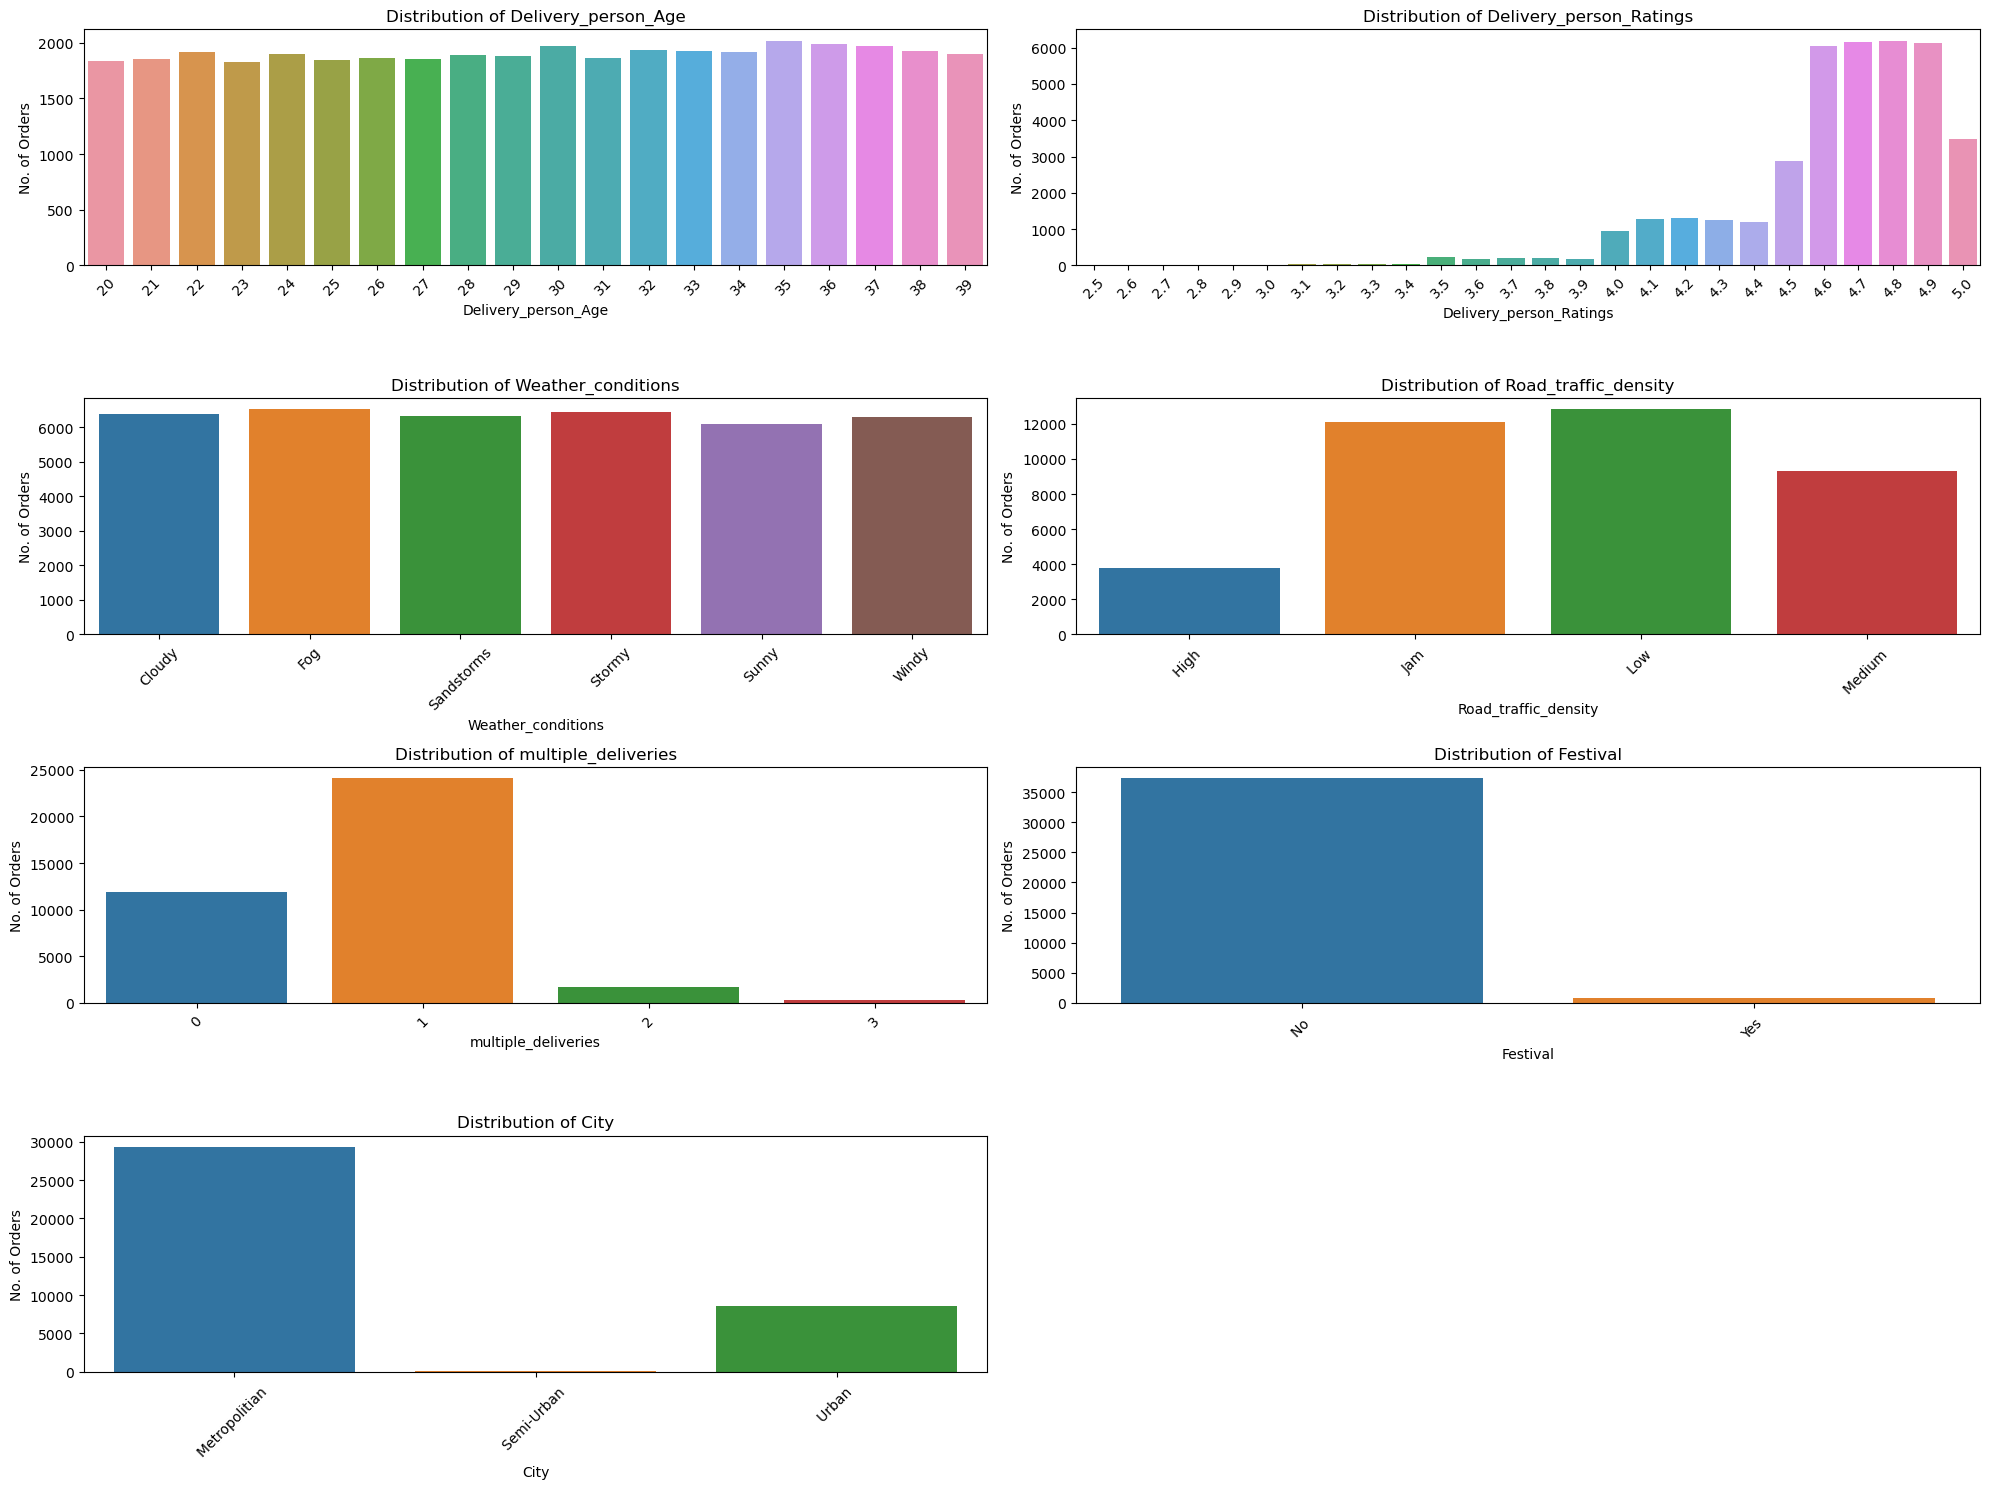

In [13]:
# Visualize the distribution of key categorical features (already cleaned)
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
        'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City']

num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.countplot(
        data=df_train,
        x=column_name,
        order=df_train[column_name].value_counts().sort_index().index,
        ax=ax
    )

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(f'Distribution of {column_name}')
    ax.tick_params(axis='x', rotation=45)

# If odd number of plots, remove empty subplot
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [14]:
#Date Featruring
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,3,1,2022,5,0,0,0,0,0,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,3,1,2022,4,0,0,0,0,0,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,3,1,2022,5,0,0,0,0,0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,4,2,2022,1,0,0,0,0,0,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,3,1,2022,5,0,0,0,0,0,1


In [15]:
def calculate_time_diff(df):
    # Convert the time columns to timedelta
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

    # Correctly format the picked time, handling cases where picked time is on the next day
    df['Time_Order_picked_formatted'] = df['Order_Date'] + df['Time_Order_picked']
    mask = df['Time_Order_picked'] < df['Time_Orderd']
    df.loc[mask, 'Time_Order_picked_formatted'] += pd.DateOffset(days=1)

    # Format the ordered time
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']

    # Calculate the order preparation time in minutes
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60

    # Handle null values by assigning the result of fillna() to the column explicitly
    df['order_prepare_time'] = df['order_prepare_time'].fillna(df['order_prepare_time'].median())

    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)

# Assuming df_train is your DataFrame
calculate_time_diff(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,1,2022,5,0,0,0,0,0,1,15.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,1,2022,4,0,0,0,0,0,0,5.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,1,2022,5,0,0,0,0,0,1,15.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2,2022,1,0,0,0,0,0,0,10.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,1,2022,5,0,0,0,0,0,1,15.0


In [16]:
from geopy.distance import geodesic
import numpy as np
import pandas as pd

def calculate_distance(df: pd.DataFrame) -> None:
    """
    Add a `distance` column (in kilometres, float64) to `df`
    by computing the great‑circle distance between each
    restaurant and delivery location.

    The function mutates `df` in place and does **not** return anything.
    """
    # 1. Pull coordinate pairs as NumPy arrays for faster iteration
    restaurant_coords = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    delivery_coords   = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    
    # 2. Compute geodesic distance row‑wise
    df["distance"] = [
        geodesic(rest, dest).kilometers          # accurate WGS‑84 great‑circle distance
        for rest, dest in zip(restaurant_coords, delivery_coords)
    ]
    
    # 3. Optional: handle missing or absurd coordinates
    #    (uncomment if your raw data may have NaNs or zeros)
    # mask_bad = df["distance"].isna() | (df["distance"] == 0)
    # df.loc[mask_bad, "distance"] = np.nan   # keep NaN and impute later if needed

    # 4. If you plan to scale features later, you can leave it as float64.
    #    No rounding or type‑casting here, so you keep full precision.
    
    
calculate_distance(df_train)
df_train[["Restaurant_latitude", "Restaurant_longitude",
          "Delivery_location_latitude", "Delivery_location_longitude",
          "distance"]].head()



,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance
0,22.745049,75.892471,22.765049,75.912471,3.020737
1,12.913041,77.683237,13.043041,77.813237,20.143737
2,12.914264,77.678400,12.924264,77.688400,1.549693
3,11.003669,76.976494,11.053669,77.026494,7.774497
4,12.972793,80.249982,13.012793,80.289982,6.197898


In [ ]:
"""
This script performs comprehensive preprocessing and exploratory data analysis (EDA) on the given dataset.
Key steps involved in the workflow include:

1. **Data Cleaning**:
   - Handling missing values
   - Removing duplicates
   - Filtering out irrelevant or inconsistent entries

2. **Data Type Formatting**:
   - Converting columns to appropriate data types (e.g., strings to datetime, integers to category)
   - Ensuring consistency in data formats

3. **Feature Engineering**:
   - Calculating `order_preparing_time` by computing the time difference between order placement and preparation
   - Extracting temporal features (year, month, day, weekday, hour, etc.) from datetime columns

4. **Data Visualization**:
   - Creating informative visualizations using `matplotlib` and `seaborn` to understand trends, distributions, and relationships in the data
   - Visualizing time-based patterns, category distributions, and correlation heatmaps

5. **Additional Enhancements**:
   - Using `numpy` and `pandas` for efficient array and DataFrame operations
   - Leveraging `scikit-learn` utilities where applicable for scaling, encoding, or splitting the data for further analysis or modeling

This structured approach helps in gaining meaningful insights, preparing the dataset for modeling, and ensuring data quality.
"""


In [17]:
# Import OrdinalEncoder from scikit‑learn
from sklearn.preprocessing import OrdinalEncoder

def label_encoding(df):
    # 1️⃣ Identify all columns whose dtype is 'object' (strings)
    categorical_columns = df.select_dtypes(include='object').columns

    # 2️⃣ Create ONE encoder that can treat every column separately
    #    handle_unknown='use_encoded_value' lets us map any brand‑new
    #    category (at inference time) to -1 instead of crashing.
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    # 3️⃣ Fit the encoder on the slice of the DataFrame that contains
    #    only the categorical columns, then transform that slice.
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])

    # 4️⃣ Optionally return the fitted encoder so you can reuse it later
    #    when you need to transform validation / production data.
    return oe

encoder = label_encoding(df_train)
df_train.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,4.0,0.0,2,3.0,...,2022,5,0,0,0,0,0,1,15.0,3.020737
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3.0,1.0,2,3.0,...,2022,4,0,0,0,0,0,0,5.0,20.143737
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2.0,2.0,0,1.0,...,2022,5,0,0,0,0,0,1,15.0,1.549693
3,38,4.7,11.003669,76.976494,11.053669,77.026494,4.0,3.0,0,0.0,...,2022,1,0,0,0,0,0,0,10.0,7.774497
4,32,4.6,12.972793,80.249982,13.012793,80.289982,0.0,0.0,1,3.0,...,2022,5,0,0,0,0,0,1,15.0,6.197898


In [18]:
df_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'is_weekend', 'order_prepare_time',
       'distance'],
      dtype='object')

In [19]:
#Dropping the lantitude and longitude column of resturant and delivery location because we directly provide distance(in km)
def drop_columns(df):
    df.drop([ 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'quarter','Vehicle_condition', 'City_code','day_of_week','is_month_end', 'is_quarter_end',
       'is_year_start', 'is_year_end'], axis=1, inplace=True)
print("Before No. of columns: ", df_train.shape[1])
drop_columns(df_train)
print("After No. of colums: ", df_train.shape[1])

Before No. of columns:  29
After No. of colums:  17


In [20]:
print(df_train.columns.tolist())

['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'day', 'month', 'year', 'is_month_start', 'is_weekend', 'order_prepare_time', 'distance']


In [21]:
# Check the column names and strip any leading/trailing whitespace
df_train.columns = df_train.columns.str.strip()

# Now try dropping the column again
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30450, 16)
(30450,)
(7613, 16)
(7613,)


In [22]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler=StandardScaler()
# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train=scaler.transform(X_train)

# Perform standardization on the testing data
X_test=scaler.transform(X_test)

In [23]:
# ------------------------------------------------------------------
# Libraries
# ------------------------------------------------------------------
import numpy as np
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
import xgboost as xgb

# ------------------------------------------------------------------
# Model dictionary: name → (estimator, param_distributions)
# ------------------------------------------------------------------
models = {
    "LinearRegression": (
        LinearRegression(),
        {}                         # nothing to tune
    ),
    "DecisionTree": (
        DecisionTreeRegressor(random_state=42),
        {
            "max_depth":        randint(2, 11),
            "min_samples_split": randint(2, 21)
        }
    ),
    "RandomForest": (
        RandomForestRegressor(
            random_state=42,
            n_jobs=-1
        ),
        {
            "n_estimators":     randint(80, 301),   # 80–300 trees
            "max_depth":        randint(3, 11),
            "min_samples_split": randint(2, 21)
        }
    ),
    "XGBRegressor": (
        xgb.XGBRegressor(
            random_state=42,
            objective="reg:squarederror",
            n_jobs=-1,
            verbosity=0
        ),
        {
            "n_estimators":     randint(20, 101),   # 20–100
            "max_depth":        randint(3, 11),
            "learning_rate":    uniform(0.03, 0.25)
        }
    )
}

# ------------------------------------------------------------------
# Search & report
# ------------------------------------------------------------------
for name, (estimator, param_dist) in models.items():
    # use 10 random draws (1 for linear model = no tuning)
    n_iter = 1 if not param_dist else 10

    search = RandomizedSearchCV(
        estimator,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=5,
        scoring="r2",
        n_jobs=-1,
        random_state=42,
        verbose=1                # prints progress
    )

    search.fit(X_train, y_train)
    print(f"🔹 {name}")
    print("   Best params:", search.best_params_)
    print("   Best R²    :", round(search.best_score_, 3), "\n")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
🔹 LinearRegression
   Best params: {}
   Best R²    : 0.411 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔹 DecisionTree
   Best params: {'max_depth': 9, 'min_samples_split': 13}
   Best R²    : 0.764 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔹 RandomForest
   Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 283}
   Best R²    : 0.781 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔹 XGBRegressor
   Best params: {'learning_rate': 0.1448122229914668, 'max_depth': 7, 'n_estimators': 43}
   Best R²    : 0.788 



In [24]:
# ✨ Ready‑to‑run evaluation snippet (requires scikit‑learn ≥ 0.22)
# I am using randomforest , because its easy to maintanin and also its R2 is similar to xgbregressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import numpy as np

# --- train the tuned forest on all training data ---
best_rf = RandomForestRegressor(
    n_estimators=201,
    max_depth=10,
    min_samples_split=8,
    n_jobs=-1,
    random_state=42
)
best_rf.fit(X_train, y_train)

# Evaluate the fitted model (works on any scikit‑learn version)

y_pred = best_rf.predict(X_test)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # ← manual RMSE

print(f"Test R² : {r2:.3f}")
print(f"MAE      : {mae:.2f} min")
print(f"RMSE     : {rmse:.2f} min")


Test R² : 0.774
MAE      : 3.45 min
RMSE     : 4.35 min


In [25]:
# --- only run this ONCE right after you have best_rf & scaler -----------------
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ("scaler", scaler),   # the StandardScaler you already fitted
    ("rf",     best_rf)   # the trained RandomForestRegressor
])

joblib.dump(pipeline, "delivery_time_pipeline.pkl")
print("✅  Pipeline saved to delivery_time_pipeline.pkl")


✅  Pipeline saved to delivery_time_pipeline.pkl


In [28]:
#simple test to check the model is working or not 
"""import joblib, pandas as pd

# ------------------------------------------------------------
# 2.1  Load the pipeline
# ------------------------------------------------------------
pipe = joblib.load("delivery_time_pipeline.pkl")

# ------------------------------------------------------------
# 2.2  Build ONE test order
#      ⚠️ Replace example numbers with real values or integers
#      that match your label‑encoding.
# ------------------------------------------------------------
sample = pd.DataFrame([{
    "Delivery_person_Age"   : 32,
    "Delivery_person_Ratings": 4.5,
    "Weather_conditions"    : 1,
    "Road_traffic_density"  : 2,
    "Type_of_order"         : 0,
    "Type_of_vehicle"       : 1,
    "multiple_deliveries"   : 0,
    "Festival"              : 0,
    "City"                  : 1,
    "day"                   : 14,
    "month"                 : 7,
    "year"                  : 2025,
    "is_month_start"        : 0,
    "is_weekend"            : 0,
    "order_prepare_time"    : 18,
    "distance"              : 20.4
}])

# ------------------------------------------------------------
# 2.3  Predict (scaling happens INSIDE the pipeline)
# ------------------------------------------------------------
pred_minutes = pipe.predict(sample)[0]
print(f"🕒  Predicted delivery time: {pred_minutes:.2f} min") """


🕒  Predicted delivery time: 33.58 min
